In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import cv2
from matplotlib.image import imread
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir('/content/chest_Xray/test/NORMAL/'):
  img = imread('/content/chest_Xray/test/NORMAL'+'/'+image_filename)
  d1,d2 = img.shape
  dim1.append(d1)
  dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


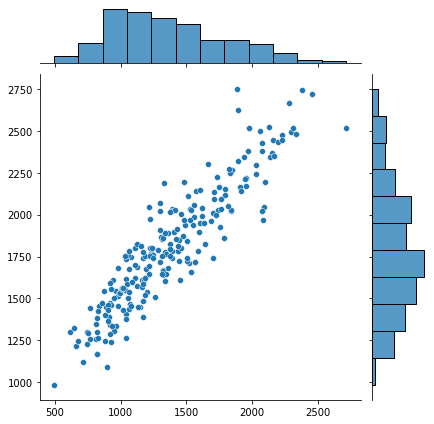

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

1369.0897435897436

In [ ]:
np.mean(dim2)

1800.3034188034187

In [4]:
img_dims = 139
img_dims2 = 180
batch_size = 60

In [5]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape =(img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(256, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [6]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
input_path = r'C:/Users/smonn/Desktop/T8-AI&BigData_pdf/chest_Xray/chest_Xray/'
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(directory=input_path+'train',
target_size = (img_dims, img_dims2),
batch_size = batch_size,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory(directory=input_path+'test',
target_size = (img_dims, img_dims2),
batch_size = batch_size,
class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
epochs = 20  
early_stop = EarlyStopping(monitor='val_loss', patience=2)
hist = classifier.fit_generator(training_set, steps_per_epoch=training_set.samples // batch_size,
                                epochs=epochs, validation_data=test_set,
                                validation_steps= test_set.samples, callbacks=[early_stop])

C:\Users\smonn\AppData\Local\Temp/ipykernel_17028/657435159.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = classifier.fit_generator(           training_set, steps_per_epoch=training_set.samples // batch_size,             epochs=epochs, validation_data=test_set,             validation_steps= test_set.samples, callbacks=[early_stop])


Epoch 1/20
86/86 [==============================] - 84s 878ms/step - loss: 0.4981 - accuracy: 0.7665 - val_loss: 0.3880 - val_accuracy: 0.8141
Epoch 2/20
86/86 [==============================] - 50s 577ms/step - loss: 0.2504 - accuracy: 0.8916
Epoch 3/20
86/86 [==============================] - 51s 590ms/step - loss: 0.2166 - accuracy: 0.9116
Epoch 4/20
86/86 [==============================] - 50s 573ms/step - loss: 0.1873 - accuracy: 0.9277
Epoch 5/20
86/86 [==============================] - 48s 558ms/step - loss: 0.1577 - accuracy: 0.9397
Epoch 6/20
86/86 [==============================] - 50s 576ms/step - loss: 0.1776 - accuracy: 0.9335
Epoch 7/20
86/86 [==============================] - 48s 551ms/step - loss: 0.1393 - accuracy: 0.9482
Epoch 8/20
86/86 [==============================] - 48s 550ms/step - loss: 0.1368 - accuracy: 0.9478
Epoch 9/20
86/86 [==============================] - 48s 562ms/step - loss: 0.1434 - accuracy: 0.9472
Epoch 10/20
86/86 [==============================

In [15]:
pred_probabilities = classifier.predict(test_set)
# classifier.save('/content/modelsave')

In [16]:
pred_probabilities

array([[0.23035672],
       [0.99916625],
       [0.38644415],
       [0.3054657 ],
       [0.9461255 ],
       [0.917541  ],
       [0.9999747 ],
       [0.9999347 ],
       [0.9986732 ],
       [0.998754  ],
       [0.08884248],
       [0.06261795],
       [0.99815387],
       [0.99929726],
       [0.9999995 ],
       [0.19304729],
       [0.97780526],
       [0.8784801 ],
       [0.45888737],
       [0.96920377],
       [0.99999726],
       [0.95761436],
       [0.9997577 ],
       [0.98615426],
       [0.99999034],
       [0.9998369 ],
       [0.9918338 ],
       [0.9996872 ],
       [0.9985203 ],
       [0.99993885],
       [0.90800244],
       [0.21522173],
       [0.999634  ],
       [0.9919205 ],
       [0.99999976],
       [0.9999552 ],
       [0.9840402 ],
       [0.9991709 ],
       [0.91639465],
       [0.99999523],
       [0.15029886],
       [0.9993777 ],
       [0.9999274 ],
       [0.9616818 ],
       [0.993284  ],
       [0.9634219 ],
       [0.25608975],
       [0.998

In [17]:
plt.figure(figsize=(10,6))
predictions = np.argmax(classifier.predict(img_dims),axis=1)
sns.heatmap(confusion_matrix(img_dims2,predictions),annot=True)

IndexError: list index out of range

<Figure size 720x432 with 0 Axes>

In [59]:
my_image = image.load_img(r'C:/Users/smonn/Desktop/T8-AI&BigData_pdf/chest_Xray/chest_Xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg', target_size=(139,180))

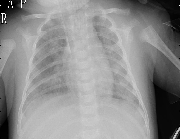

In [60]:
my_image

In [61]:
my_image = image.img_to_array(my_image)

In [62]:
my_image = np.expand_dims(my_image, axis=0)

In [63]:
(classifier.predict(my_image) > 0.9).astype('int32')

array([[1]])

In [58]:
test_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}